In [2]:
import kagglehub
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

classification_folder = os.path.join(path, 'Knee Osteoarthritis Classification')
train_path = os.path.join(classification_folder, 'train')
val_path = os.path.join(classification_folder, 'val')
test_path = os.path.join(classification_folder, 'test')

print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")





Train path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train
Validation path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val
Test path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test


In [3]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 59s 366ms/step - accuracy: 0.3590 - loss: 1.4730 - val_accuracy: 0.3333 - val_loss: 1.1035 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - accuracy: 0.3557 - loss: 1.1842 - val_accuracy: 0.3556 - val_loss: 1.0840 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 302ms/step - accuracy: 0.3597 - loss: 1.1206 - val_accuracy: 0.4741 - val_loss: 1.0750 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - accuracy: 0.3680 - loss: 1.1011 - val_accuracy: 0.4806 - val_loss: 1.0672 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 273ms/step - accuracy: 0.3974 - loss: 1.0864 - val_accuracy: 0.5065 - val_loss: 1.0497 - learning_rate: 1.0000e-04
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 273ms/step - accuracy: 0.4288 - loss: 1.0598 - val_accuracy: 0.4778 - val_loss: 1.0420 - learning_rate: 1.0000e-04
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━

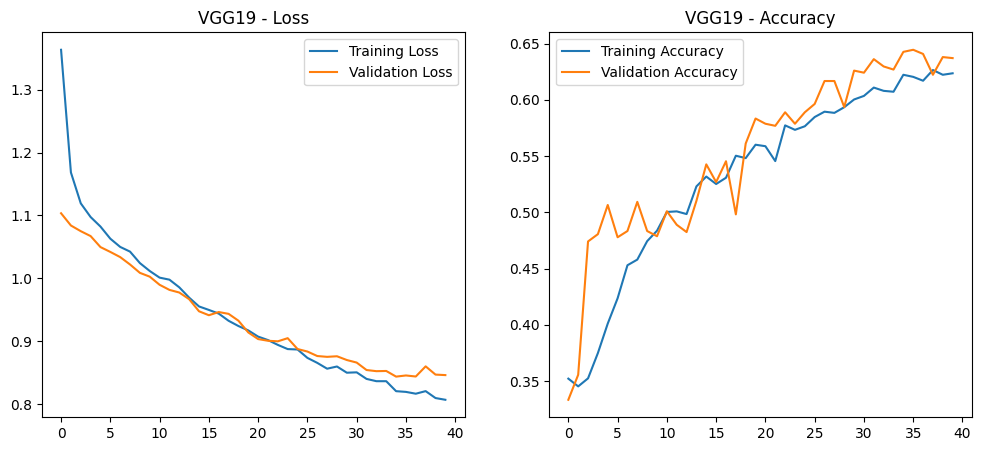

17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 894ms/step - accuracy: 0.5336 - loss: 0.8466
Test Accuracy: 0.67, Test Loss: 0.74
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step
              precision    recall  f1-score   support

      Normal       0.77      0.46      0.57       180
  Osteopenia       0.73      0.91      0.81       180
Osteoporosis       0.56      0.65      0.60       180

    accuracy                           0.67       540
   macro avg       0.69      0.67      0.66       540
weighted avg       0.69      0.67      0.66       540



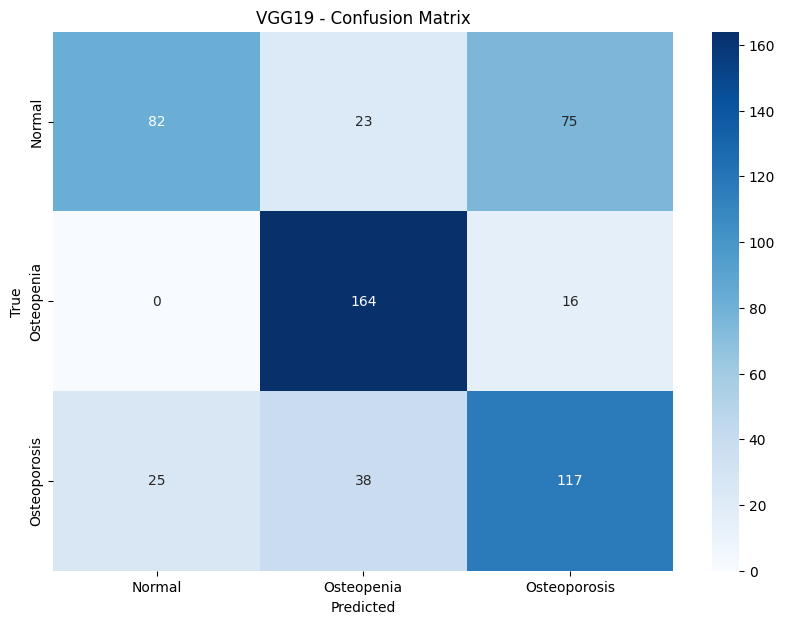

In [4]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define VGG19 Base Model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Build Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

model.save("/content/VGG19_KneeOsteo_DeepModel.keras")

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('VGG19 - Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('VGG19 - Accuracy')
plt.show()

# Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}')

# Classification Report and Confusion Matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VGG19 - Confusion Matrix')
plt.show()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 240ms/step - accuracy: 0.3282 - loss: 1.2026 - val_accuracy: 0.4667 - val_loss: 1.0568
Epoch 2/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 225ms/step - accuracy: 0.4108 - loss: 1.0855 - val_accuracy: 0.4852 - val_loss: 1.0252
Epoch 3/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 218ms/step - accuracy: 0.4706 - loss: 1.0270 - val_accuracy: 0.5454 - val_loss: 0.9989
Epoch 4/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 217ms/step - accuracy: 0.5104 - loss: 0.9805 - val_accuracy: 0.5759 - val_loss: 0.9824
Epoch 5/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 221ms/step - accuracy: 0.5460 - loss: 0.9493 - val_accuracy: 0.5648 - val_loss: 0.9732
Epoch 6/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 220ms/step - accuracy: 0.5650 - loss: 0.9208 - val_accuracy: 0.5898 - val_loss: 0.9572
Epoch 7/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 219ms/step - accuracy: 0.5582 - loss: 0.9159 - val_accuracy: 0.5870 - val_loss: 0.9502
Epoch 8/60
119/119 ━━━━━━━━━━━━━

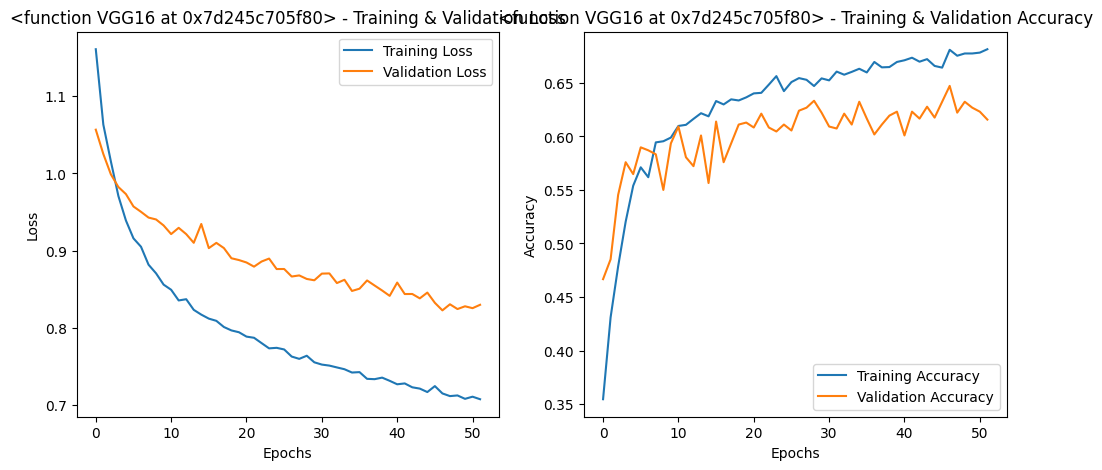

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.5181 - loss: 0.8584
Test Accuracy: 0.68
Test Loss: 0.71
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step
Classification Report:

              precision    recall  f1-score   support

      Normal       0.83      0.44      0.58       180
  Osteopenia       0.74      0.87      0.80       180
Osteoporosis       0.57      0.74      0.64       180

    accuracy                           0.68       540
   macro avg       0.71      0.68      0.67       540
weighted avg       0.71      0.68      0.67       540



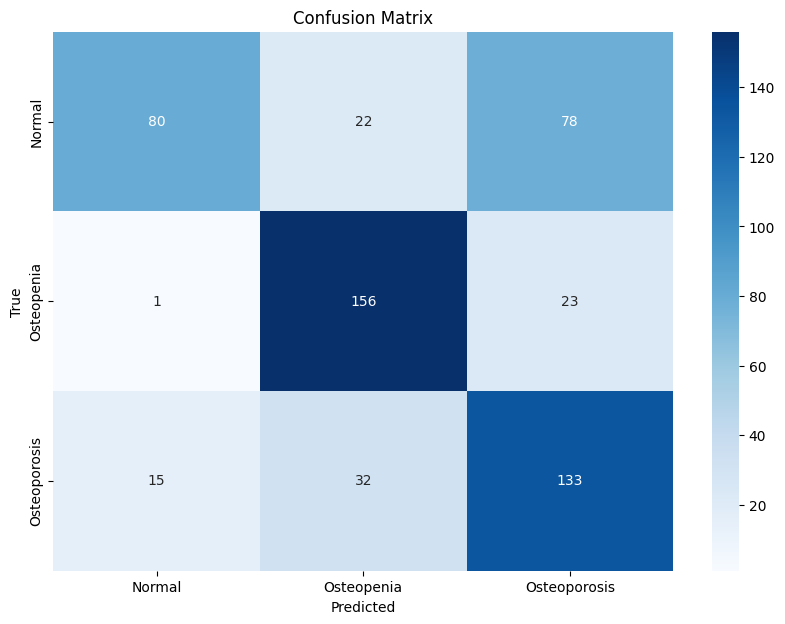

Loading <function VGG16 at 0x7d245c705f80> model...

Loaded <function VGG16 at 0x7d245c705f80> Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,110,987 (57.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 264,200 (1.01 MB)

In [6]:
from tensorflow.keras.applications import VGG16
base_model= VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])


model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)




history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=60,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

model_name=VGG16

model.save(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
print(f"{model_name} training complete! Model saved.")



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'{model_name} - Training & Validation Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'{model_name} - Training & Validation Accuracy')

plt.show()



test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))





cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print(f"Loading {model_name} model...")
loaded_model = tf.keras.models.load_model(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
print(f"\nLoaded {model_name} Model Architecture:")
loaded_model.summary()

